Your goal is to predict the binary class heart_disease_present, which represents whether a patient has heart disease or not:

•	0 represents no heart disease present

•	1 represents heart disease present


Dataset

There are 15 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 14 features are described in the section below.

•	slope_of_peak_exercise_st_segment (type: int)       : the slope of the peak exercise ST segment, an electrocardiography read                                                           out indicating quality of blood flow to the heart

•	thal (type: categorical)                            : results of thallium stress test measuring blood flow to the heart,   
                                                          with possible values normal,fixed_defect, reversible_defect
       
•	resting_blood_pressure (type: int)                  : resting blood pressure

•	chest_pain_type (type: int)                         : chest pain type (4 values)

•	num_major_vessels (type: int)                       : number of major vessels (0-3) colored by flourosopy

•	fasting_blood_sugar_gt_120_mg_per_dl (type: binary) : fasting blood sugar > 120  mg/dl

•	resting_ekg_results (type: int)                     : resting electrocardiographic results (values 0,1,2)

•	serum_cholesterol_mg_per_dl (type: int)             : serum cholestoral in mg/dl

•	oldpeak_eq_st_depression (type: float)              : oldpeak = ST depression induced by  exercise relative to rest, a  
                                                          measure of abnormality in electrocardiograms
    
•	sex (type: binary)                                  : 0: female, 1: male

•	age (type: int)                                     : age in years

•	max_heart_rate_achieved (type: int)                 : maximum heart rate achieved (beats per minute)

•	exercise_induced_angina (type: binary)              : exercise-induced chest pain (0:  False, 1: True)

•	heart_disease_present                               : 0 (represents no heart disease present) and	
                                                          1 (represents heart disease present)


Feature data example

Here's an example of one of the rows in the dataset so that you can see the kinds of values you might expect in the dataset. Some are binary, some are integers, some are floats, and some are categorical. There are no missing values.

Field	                                      : Value
slope_of_peak_exercise_st_segment	          : 2
Thal	                                      : Normal
resting_blood_pressure	                      : 125
chest_pain_type	                              : 3
num_major_vessels	                          : 0
fasting_blood_sugar_gt_120_mg_per_dl	      : 1
resting_ekg_results	                          : 2
serum_cholesterol_mg_per_dl	                  : 245
oldpeak_eq_st_depression	                  : 2.4
Sex	                                          : 1
Age	                                          : 51
max_heart_rate_achieved	                      : 166
exercise_induced_angina	                      : 0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

C:\Users\kittu\AppData\Roaming\Python\Python36\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df1=pd.read_csv('C:/Users/kittu/Desktop/Kittu/My home corona/Datamites class work/Datamites projects/Datamites project 4/labels.csv')
df2=pd.read_csv('C:/Users/kittu/Desktop/Kittu/My home corona/Datamites class work/Datamites projects/Datamites project 4/values.csv')
df2.head(2)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0


In [3]:
df = df2.merge(df1,how='left')
df.head(2)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0


In [4]:
df.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [5]:
df.shape

(180, 15)

In [6]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [7]:
df.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

patient_id                              180
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

In [10]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


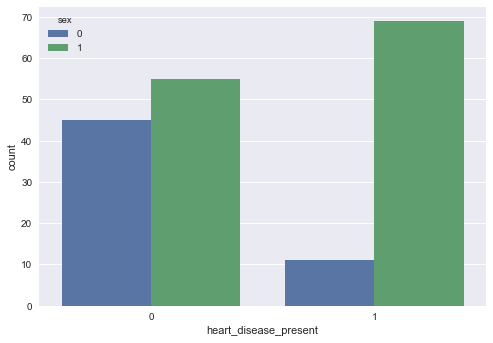

0    100
1     80
Name: heart_disease_present, dtype: int64
1    124
0     56
Name: sex, dtype: int64


In [11]:
# 0 represent for no heart disease and 1 represent for heart disease so it is an unbalanced data set
# 0 for male and 1 for female
sns.countplot(x='heart_disease_present',hue='sex',data=df)
plt.show()
print(df.heart_disease_present.value_counts())
print(df.sex.value_counts())

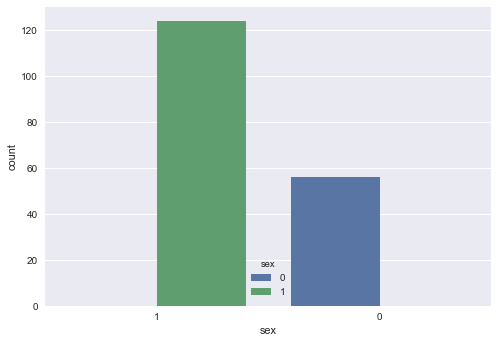

In [12]:
# 0 for female counts and 1 for male counts
sns.countplot(x='sex',hue = 'sex',data=df,order = df['sex'].value_counts().index)
plt.show()

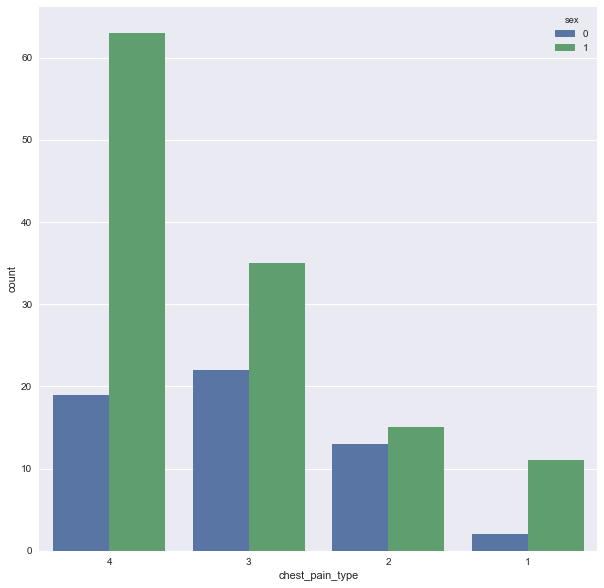

In [13]:
# 0 for female counts and 1 for male counts
plt.figure(figsize=(10,10))
sns.countplot(x='chest_pain_type',hue = 'sex',data=df,order = df['chest_pain_type'].value_counts().index)
plt.show()

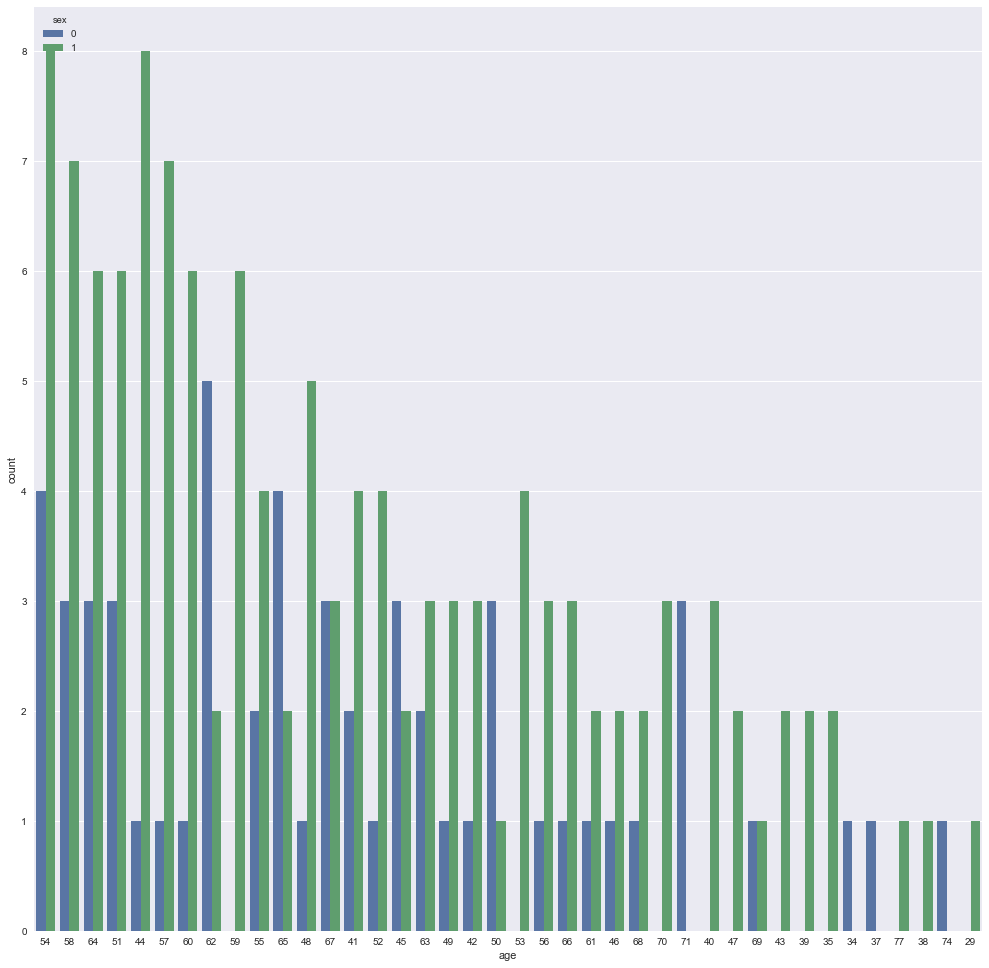

(29, 77)

In [14]:
# 0 for female counts and 1 for male counts
plt.figure(figsize=(17,17))
sns.countplot(x='age',hue = 'sex',data=df,order = df['age'].value_counts().index)
plt.show()
df.age.min(),df.age.max()
# Here suffered disease male and female people in age between from 54 to 59 years old

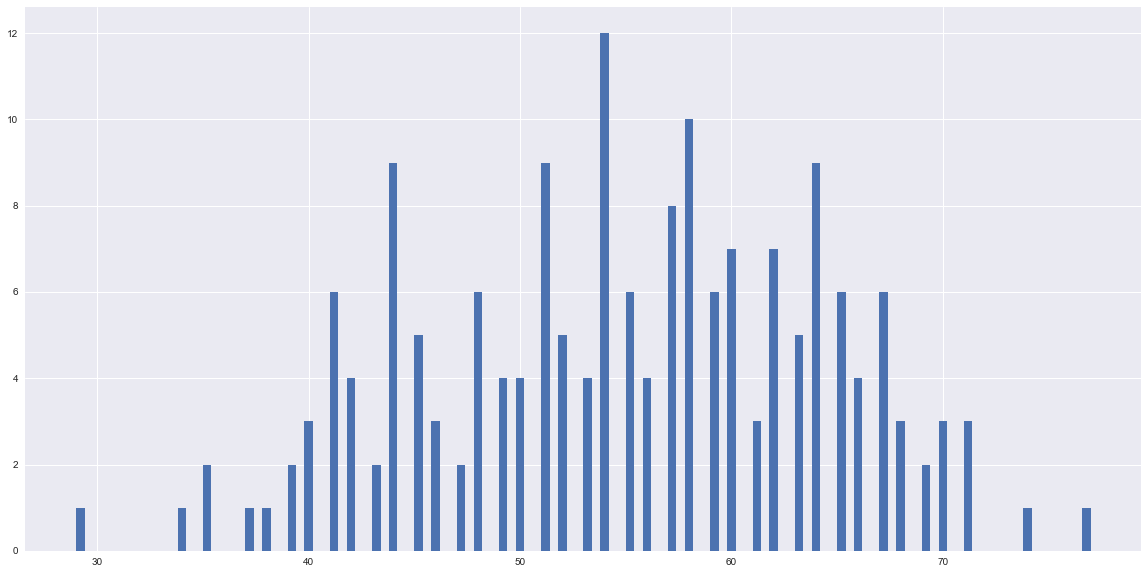

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
plt.hist(df.age,bins=120)
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df.thal = enc.fit_transform(df.thal)

In [17]:
df1 = df.iloc[:,1:]
df1.head(5)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [18]:
X = df1.iloc[:,:-1]
X.head()
X.shape

(180, 13)

In [19]:
y=df1.heart_disease_present
y.head()

0    0
1    0
2    1
3    1
4    0
Name: heart_disease_present, dtype: int64

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=13) # k = 13 for total independent features 
ordered_feature=ordered_rank_features.fit(X,y)

In [22]:
df1scores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
df1columns=pd.DataFrame(X.columns)

In [23]:
features_rank=pd.concat([df1columns,df1scores],axis=1)

In [24]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,slope_of_peak_exercise_st_segment,5.240323
1,thal,8.458537
2,resting_blood_pressure,2.431004
3,chest_pain_type,8.514173
4,num_major_vessels,43.033600
5,fasting_blood_sugar_gt_120_mg_per_dl,0.001724
6,resting_ekg_results,3.621429
7,serum_cholesterol_mg_per_dl,12.703839
8,oldpeak_eq_st_depression,32.678243
9,sex,6.300403


In [25]:
features_rank.nlargest(13,'Score')

,Features,Score
11,max_heart_rate_achieved,82.127149
4,num_major_vessels,43.033600
8,oldpeak_eq_st_depression,32.678243
12,exercise_induced_angina,24.757895
7,serum_cholesterol_mg_per_dl,12.703839
3,chest_pain_type,8.514173
1,thal,8.458537
9,sex,6.300403
10,age,5.439368
0,slope_of_peak_exercise_st_segment,5.240323


# Feature Importance
This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [27]:
print(model.feature_importances_)

[0.06542843 0.13951278 0.0622115  0.11602002 0.0990573  0.02035967
 0.03645354 0.06578847 0.08113843 0.06112009 0.07150898 0.0826115
 0.0987893 ]


# Correlation

In [28]:
df1.corr()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,0.154101,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.344224
thal,0.154101,1.000000,-0.006088,0.269583,0.174107,-0.070225,-0.052171,0.046448,0.251972,0.265420,-0.007934,-0.142098,0.360395,0.447214
resting_blood_pressure,0.098287,-0.006088,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.078506
chest_pain_type,0.121207,0.269583,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,0.412829
num_major_vessels,0.076832,0.174107,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,-0.070225,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.003379
resting_ekg_results,0.172191,-0.052171,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholesterol_mg_per_dl,-0.032348,0.046448,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,0.079775
oldpeak_eq_st_depression,0.615948,0.251972,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.382930
sex,0.093340,0.265420,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096,0.335421


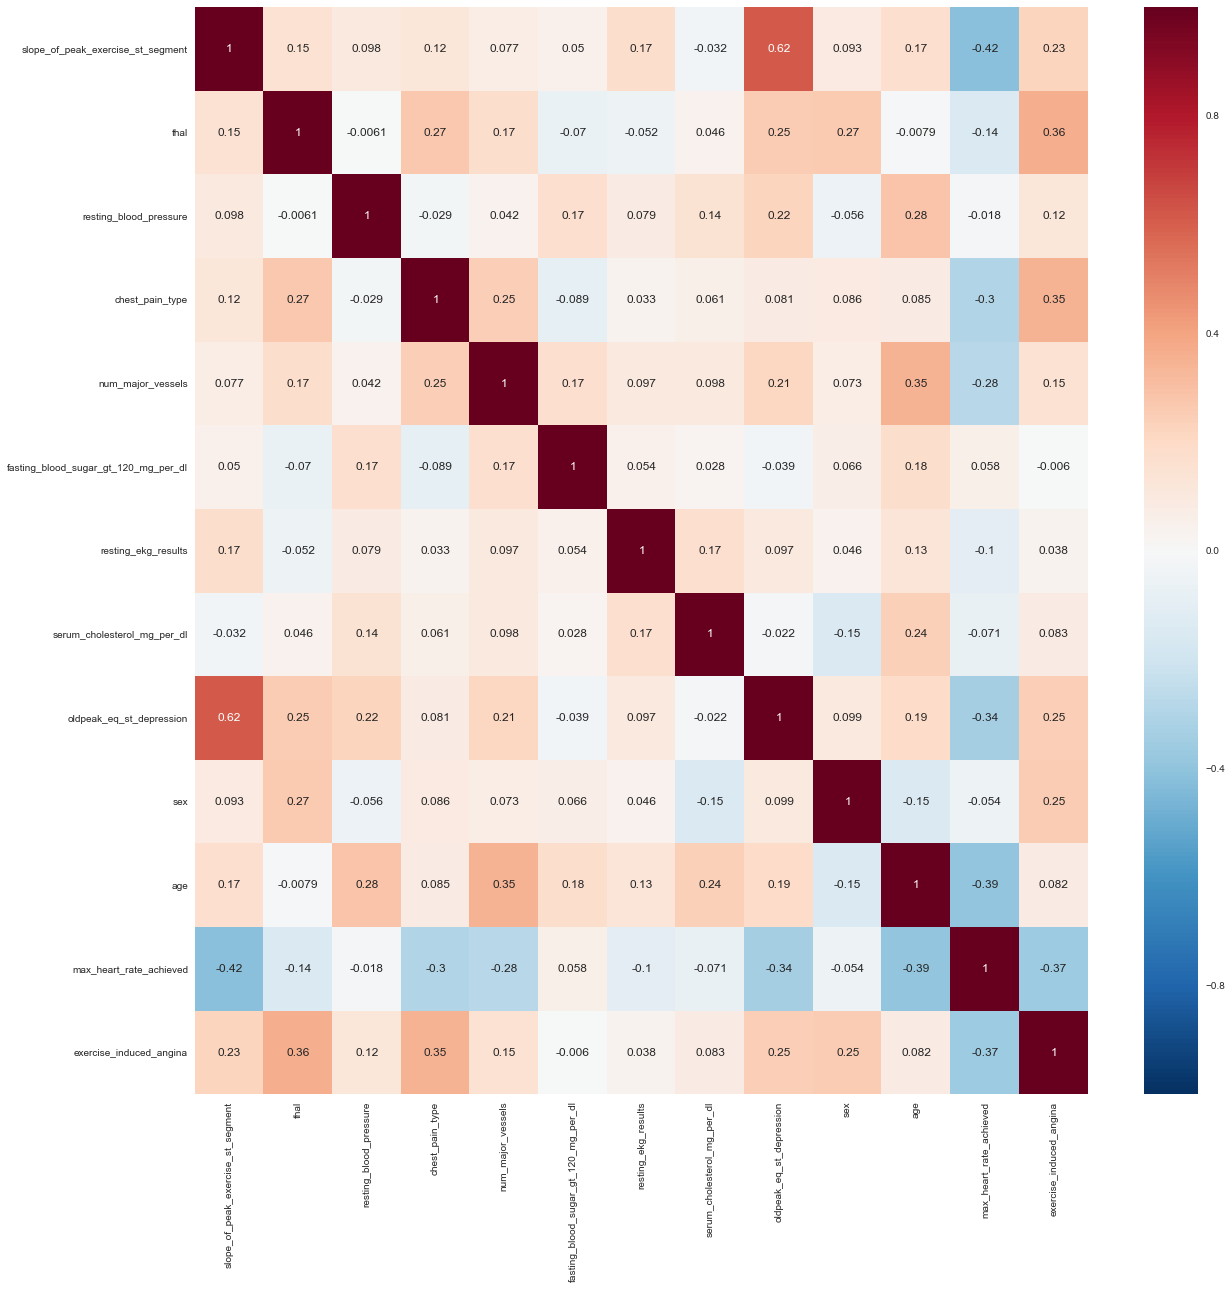

In [29]:
import seaborn as sns
corr=df1.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df1[top_features].corr(),annot=True)
plt.show()

# Remove The correlated

In [30]:
threshold=0.8

In [31]:
# find and remove correlated features
def correlation(df1, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df1.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [32]:
correlation(df1.iloc[:,:-1],threshold)

set()

# Information Gain

In [33]:
from sklearn.feature_selection import mutual_info_classif

In [34]:
mutual_info=mutual_info_classif(X,y)

In [35]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

thal                                    0.136146
chest_pain_type                         0.131277
num_major_vessels                       0.105896
oldpeak_eq_st_depression                0.100812
exercise_induced_angina                 0.061528
slope_of_peak_exercise_st_segment       0.052271
sex                                     0.050395
serum_cholesterol_mg_per_dl             0.046792
max_heart_rate_achieved                 0.044886
age                                     0.019436
resting_ekg_results                     0.000115
fasting_blood_sugar_gt_120_mg_per_dl    0.000000
resting_blood_pressure                  0.000000
dtype: float64

In [36]:
df1.drop(['fasting_blood_sugar_gt_120_mg_per_dl','resting_blood_pressure'],axis=1)

,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,2,0,2,308,0.0,1,45,170,0,0
1,2,1,3,0,0,214,1.6,0,54,158,0,0
2,1,1,4,3,2,304,0.0,1,77,162,1,1
3,1,2,4,0,0,223,0.0,1,40,181,0,1
4,3,2,1,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,4,2,0,254,0.2,1,67,163,0,1
176,2,1,4,0,1,327,3.4,0,55,117,1,1
177,2,2,3,0,0,309,1.8,1,64,131,1,1
178,1,1,3,2,0,255,0.0,1,48,175,0,0


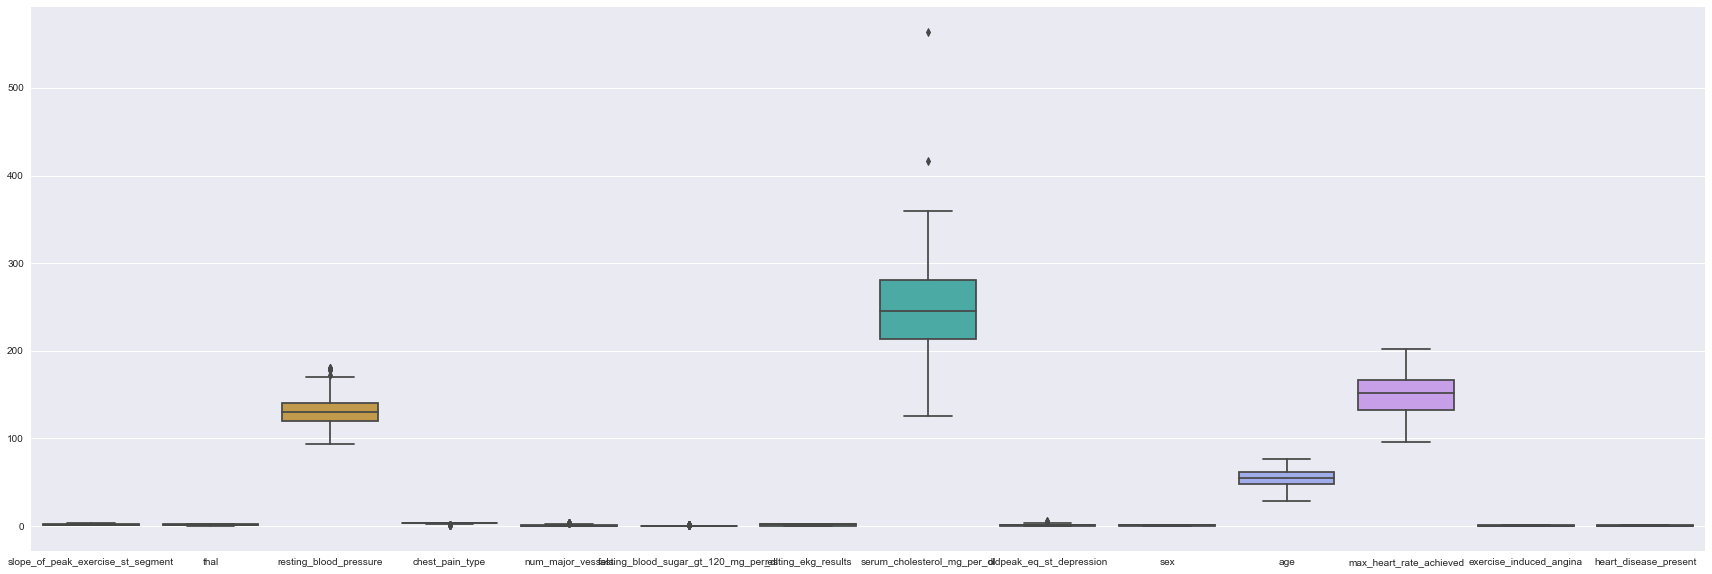

In [37]:
import warnings
warnings.simplefilter("ignore")
plt.figure(figsize=(30,10))
sns.boxplot(df1)
plt.show()

# Outliers Detection and Removing Using IQR Method

In [38]:
sorted(df1)

['age',
 'chest_pain_type',
 'exercise_induced_angina',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'heart_disease_present',
 'max_heart_rate_achieved',
 'num_major_vessels',
 'oldpeak_eq_st_depression',
 'resting_blood_pressure',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'sex',
 'slope_of_peak_exercise_st_segment',
 'thal']

In [39]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

slope_of_peak_exercise_st_segment        1.00
thal                                     1.00
resting_blood_pressure                  20.00
chest_pain_type                          1.00
num_major_vessels                        1.00
fasting_blood_sugar_gt_120_mg_per_dl     0.00
resting_ekg_results                      2.00
serum_cholesterol_mg_per_dl             67.50
oldpeak_eq_st_depression                 1.60
sex                                      1.00
age                                     14.00
max_heart_rate_achieved                 34.25
exercise_induced_angina                  1.00
heart_disease_present                    1.00
dtype: float64


In [40]:
(df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR)) # False means has no outlier and True means has outliers

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,True,False,False,False,False,False,False,False,False
176,False,False,True,False,False,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [41]:
df1_out = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [42]:
df1_out.shape

(128, 14)

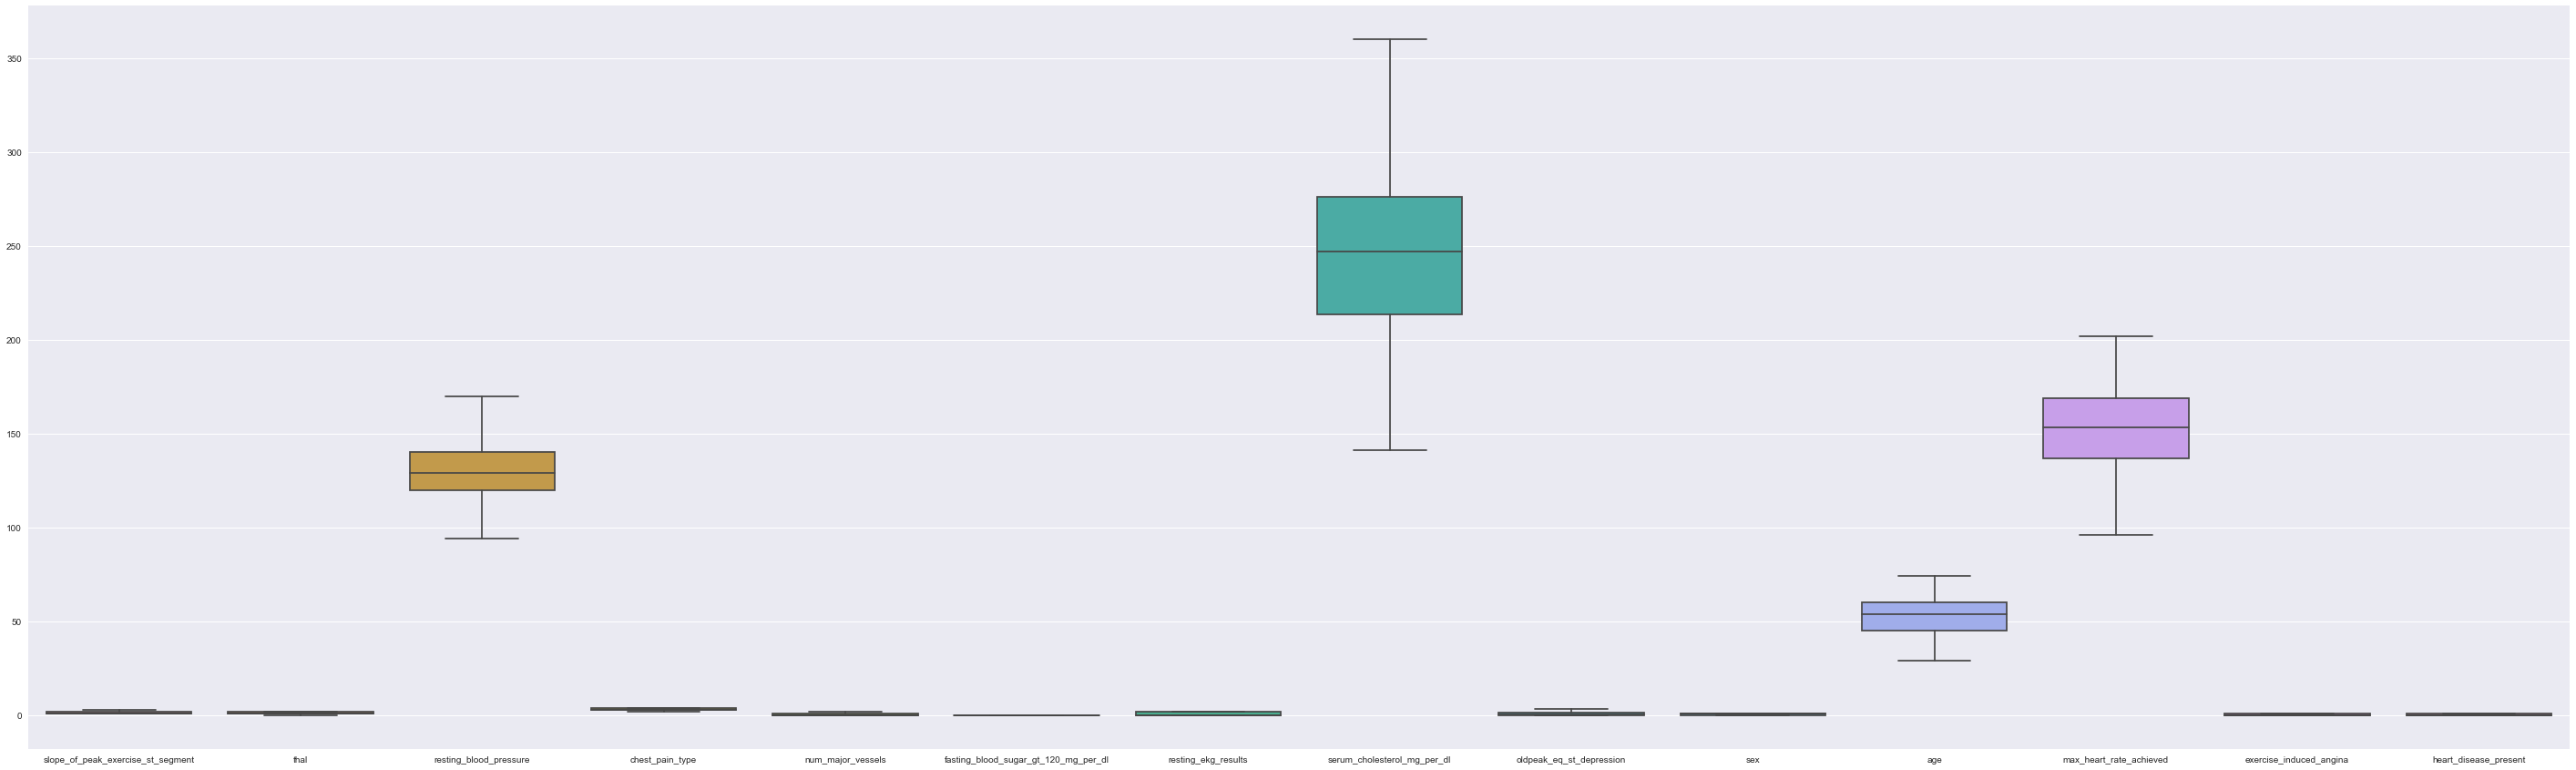

In [43]:
plt.figure(figsize=(50,15))
sns.boxplot(df1_out)
plt.show()

# Modeling

In [44]:
X=df1_out.iloc[:,:-1]
X.head(3)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0


In [45]:
y=df1_out.heart_disease_present
y.head(3)

0    0
1    0
3    1
Name: heart_disease_present, dtype: int64

In [46]:
y.value_counts() # it is unbalanced data set

0    76
1    52
Name: heart_disease_present, dtype: int64

# Model 1: LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
model=LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [48]:
accuracy_score(y_test,y_predict)

0.7948717948717948

In [49]:
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 23, 1: 16})


col_0,0,1
heart_disease_present,,
0,19,4
1,4,12


# Handling Imbalance set

In [50]:
import warnings
warnings.simplefilter('ignore')
!pip install imblearn

ERROR: Error while checking for conflicts. Please file an issue on pip's issue tracker: https://github.com/pypa/pip/issues/new
Traceback (most recent call last):
  File "c:\programdata\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "c:\programdata\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\programdata\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "c:\programdata\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceb

In [51]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [52]:
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

In [53]:
print(Counter(y_train))
print(Counter(y_train_smote))

Counter({0: 53, 1: 36})
Counter({1: 53, 0: 53})


In [54]:
X_train_smote = pd.DataFrame(X_train_smote,columns=X_train.columns)
X_train_smote.tail()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
101,2,2,127,3,0,0,0,309,1.800000,1,61,129,1
102,2,1,115,4,2,0,1,303,1.259225,1,58,123,1
103,1,2,149,4,0,0,1,269,0.826338,1,58,110,1
104,2,0,144,4,1,0,2,210,1.881096,1,62,131,0
105,1,2,128,4,0,0,0,252,1.313559,1,57,144,0


In [55]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_predict))
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

0.7948717948717948
Counter({0: 23, 1: 16})


col_0,0,1
heart_disease_present,,
0,19,4
1,4,12


In [56]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.75      0.75      0.75        16

    accuracy                           0.79        39
   macro avg       0.79      0.79      0.79        39
weighted avg       0.79      0.79      0.79        39



In [57]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_smote,y_train_smote)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']



Best: 0.865455 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
model=LogisticRegression(C=100,penalty='l2',solver ='lbfgs')
model.fit(X_train_smote,y_train_smote)
y_predict=model.predict(X_test)

In [59]:
accuracy_score(y_test,y_predict)

0.8974358974358975

In [60]:
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict) 
# we observed that o for no heart disease and 1 for heart disease and is correct prediction

Counter({0: 24, 1: 15})


col_0,0,1
heart_disease_present,,
0,20,4
1,0,15


# Plot ROC and compare AUC

In [61]:
from sklearn.metrics import roc_curve, auc
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_predict)
auc_logistic = auc(logistic_fpr, logistic_tpr)


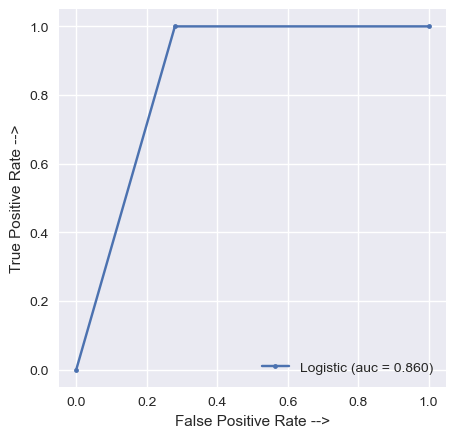

In [99]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

# Model 2: SVC

In [100]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
model=SVC()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [101]:
accuracy_score(y_test,y_predict)

0.6666666666666666

In [103]:
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 26, 1: 13})


col_0,0
heart_disease_present,
0,26
1,13


# Handling Imbalance set


In [104]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [105]:
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

In [106]:
print(Counter(y_train))
print(Counter(y_train_smote))

Counter({0: 50, 1: 39})
Counter({1: 50, 0: 50})


In [107]:
X_train_smote = pd.DataFrame(X_train_smote,columns=X_train.columns)
X_train_smote.tail()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
95,1,0,129,4,1,0,2,212,1.103586,1,64,132,0
96,2,2,123,4,0,0,0,212,1.781927,1,49,136,0
97,1,1,128,4,0,0,2,320,0.000000,0,60,169,0
98,2,2,142,4,2,0,2,287,2.013406,1,60,155,0
99,1,1,137,4,0,0,2,329,0.636618,0,60,163,0


In [108]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_predict))
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

0.5128205128205128
Counter({0: 26, 1: 13})


col_0,0,1
heart_disease_present,,
0,11,15
1,4,9


In [109]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      0.42      0.54        26
           1       0.38      0.69      0.49        13

    accuracy                           0.51        39
   macro avg       0.55      0.56      0.51        39
weighted avg       0.61      0.51      0.52        39



In [110]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ['rbf','linear','poly','sigmoid'],'C': [1,10,100,500],'gamma': [0.01,0.1,0.5,1.2]}
grid_model = GridSearchCV(SVC(random_state=10),parameters,verbose=2)
grid_model.fit(X_train_smote,y_train_smote)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   3.2s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   4.4s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 16.8min finished


GridSearchCV(estimator=SVC(random_state=10),
             param_grid={'C': [1, 10, 100, 500], 'gamma': [0.01, 0.1, 0.5, 1.2],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=2)

In [111]:
grid_model.best_score_

0.82

In [112]:
grid_model.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

In [120]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
model=SVC(C=10,gamma= 0.01, kernel= 'linear')
model.fit(X_train_smote,y_train_smote)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8717948717948718

In [121]:
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 23, 1: 16})


col_0,0,1
heart_disease_present,,
0,21,2
1,3,13


# Plot ROC and compare AUC


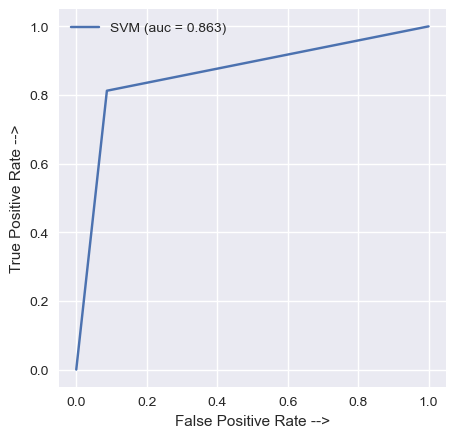

In [122]:
from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_predict)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()


# Model 3: Random Forest

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [124]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)

In [125]:
accuracy_score(y_test,y_predict)

0.7692307692307693

In [126]:
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 23, 1: 16})


col_0,0,1
heart_disease_present,,
0,20,3
1,6,10


# Handling Imbalance set

In [127]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [128]:
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

In [129]:
print(Counter(y_train))
print(Counter(y_train_smote))

Counter({0: 53, 1: 36})
Counter({0: 53, 1: 53})


In [87]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_predict))
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

0.7948717948717948
Counter({0: 23, 1: 16})


col_0,0,1
heart_disease_present,,
0,19,4
1,4,12


In [130]:
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 23, 1: 16})


col_0,0,1
heart_disease_present,,
0,20,3
1,6,10


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
# define grid search
grid = dict(n_estimators=[10, 100, 1000],max_features=['auto','sqrt', 'log2'],bootstrap= [True],max_depth= [49,50,51],min_samples_leaf=[1, 2, 4,6,8],min_samples_split=[2,5,10,14])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_smote,y_train_smote)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
model=RandomForestClassifier( )
model.fit(X_train_smote,y_train_smote)
y_predict=model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predict)

In [ ]:
from collections import Counter
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

# Plot ROC and compare AUC

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_predict)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='RF (auc = %0.3f)' % auc)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()
